In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime

#import the API key
from config import weather_api_key

In [2]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #if the city is unique, then we will add it to the cities list
    
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

625

In [5]:
# URL for making weather API calls

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+ weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop througgh all the cities in hte list

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url= url +'&q='+ city.replace(" ","+")
    
    # log the URL, record, and set numbers and the city
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add  to tge record count
    record_count +=1
    
# Run an API request for each of the cities.

    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
                
                
# if an error is experienced, skip the city
    except:
        print('City not found, Skipping...')
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    
        
        
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rio gallegos
Processing Record 2 of Set 1 | malayal
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | ust-kuyga
Processing Record 5 of Set 1 | wazzan
City not found, Skipping...
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | tonantins
Processing Record 8 of Set 1 | ouallam
Processing Record 9 of Set 1 | adelaide
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | kloulklubed
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | palmer
Processing Record 15 of Set 1 | hasaki
Processing Record 16 of Set 1 | taolanaro
City not found, Skipping...
Processing Record 17 of Set 1 | yulara
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | burns lake
Processing Record 20 of Set 1 | mys shmidta
City not found, Skipping...
Processing Record 21 of Set 1 | nuuk
Proc

Processing Record 38 of Set 4 | sungai udang
Processing Record 39 of Set 4 | sao filipe
Processing Record 40 of Set 4 | victor harbor
Processing Record 41 of Set 4 | tumannyy
City not found, Skipping...
Processing Record 42 of Set 4 | bonavista
Processing Record 43 of Set 4 | castro
Processing Record 44 of Set 4 | abakaliki
Processing Record 45 of Set 4 | jijiga
Processing Record 46 of Set 4 | krasnoselkup
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | izhmorskiy
Processing Record 49 of Set 4 | srednekolymsk
Processing Record 50 of Set 4 | bahia blanca
Processing Record 1 of Set 5 | saint-joseph
Processing Record 2 of Set 5 | airai
Processing Record 3 of Set 5 | kajansi
Processing Record 4 of Set 5 | lazaro cardenas
Processing Record 5 of Set 5 | raudeberg
Processing Record 6 of Set 5 | presidencia roque saenz pena
Processing Record 7 of Set 5 | santa isabel do rio negro
Processing Record 8 of Set 5 | svetlyy
Processing Record 9 of Set 5 | qena
Processing Re

Processing Record 26 of Set 8 | cabras
Processing Record 27 of Set 8 | chilca
Processing Record 28 of Set 8 | lida
Processing Record 29 of Set 8 | ainazi
Processing Record 30 of Set 8 | noumea
Processing Record 31 of Set 8 | maceio
Processing Record 32 of Set 8 | kurmanayevka
Processing Record 33 of Set 8 | vila franca do campo
Processing Record 34 of Set 8 | saldanha
Processing Record 35 of Set 8 | anadyr
Processing Record 36 of Set 8 | forrest city
Processing Record 37 of Set 8 | tokonou
Processing Record 38 of Set 8 | leh
Processing Record 39 of Set 8 | burla
Processing Record 40 of Set 8 | muisne
Processing Record 41 of Set 8 | emerald
Processing Record 42 of Set 8 | shimsk
Processing Record 43 of Set 8 | trinidad
Processing Record 44 of Set 8 | fare
Processing Record 45 of Set 8 | lagoa nova
Processing Record 46 of Set 8 | coxim
Processing Record 47 of Set 8 | kindu
Processing Record 48 of Set 8 | lesozavodsk
Processing Record 49 of Set 8 | cirebon
Processing Record 50 of Set 8 | 

Processing Record 14 of Set 12 | manono
Processing Record 15 of Set 12 | cimahi
Processing Record 16 of Set 12 | karatau
Processing Record 17 of Set 12 | tonota
Processing Record 18 of Set 12 | bartica
Processing Record 19 of Set 12 | backa topola
Processing Record 20 of Set 12 | acarau
Processing Record 21 of Set 12 | panaba
Processing Record 22 of Set 12 | tautira
Processing Record 23 of Set 12 | coffs harbour
Processing Record 24 of Set 12 | ngukurr
City not found, Skipping...
Processing Record 25 of Set 12 | marcona
City not found, Skipping...
Processing Record 26 of Set 12 | boffa
Processing Record 27 of Set 12 | aras
Processing Record 28 of Set 12 | isla vista
Processing Record 29 of Set 12 | inhambane
Processing Record 30 of Set 12 | xuanhua
Processing Record 31 of Set 12 | mao
Processing Record 32 of Set 12 | tawkar
City not found, Skipping...
Processing Record 33 of Set 12 | port augusta
Processing Record 34 of Set 12 | luba
Processing Record 35 of Set 12 | tilichiki
Processin

In [7]:
len(city_data)

571

In [12]:
# convert city data to a pandas data frame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rio Gallegos,-51.6226,-69.2181,39.25,52,0,8.05,AR,2021-06-19 17:42:38
1,Malayal,7.2080,121.9420,78.91,78,100,2.15,PH,2021-06-19 17:42:39
2,Bredasdorp,-34.5322,20.0403,52.92,87,20,5.75,ZA,2021-06-19 17:42:39
3,Ust-Kuyga,70.0167,135.6000,72.01,41,99,3.00,RU,2021-06-19 17:42:39
4,Hilo,19.7297,-155.0900,78.28,75,1,5.75,US,2021-06-19 17:38:01
5,Tonantins,-2.8731,-67.8022,84.97,69,49,4.29,BR,2021-06-19 17:42:40
6,Ouallam,14.3188,2.0866,101.64,22,94,2.35,NE,2021-06-19 17:42:40
7,Adelaide,-34.9333,138.6000,52.57,91,75,4.61,AU,2021-06-19 17:42:41
8,Ushuaia,-54.8000,-68.3000,42.46,81,75,13.80,AR,2021-06-19 17:38:32
9,Kloulklubed,7.0419,134.2556,79.30,72,51,5.55,PW,2021-06-19 17:42:41


In [13]:
column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rio Gallegos,AR,2021-06-19 17:42:38,-51.6226,-69.2181,39.25,52,0,8.05
1,Malayal,PH,2021-06-19 17:42:39,7.2080,121.9420,78.91,78,100,2.15
2,Bredasdorp,ZA,2021-06-19 17:42:39,-34.5322,20.0403,52.92,87,20,5.75
3,Ust-Kuyga,RU,2021-06-19 17:42:39,70.0167,135.6000,72.01,41,99,3.00
4,Hilo,US,2021-06-19 17:38:01,19.7297,-155.0900,78.28,75,1,5.75
5,Tonantins,BR,2021-06-19 17:42:40,-2.8731,-67.8022,84.97,69,49,4.29
6,Ouallam,NE,2021-06-19 17:42:40,14.3188,2.0866,101.64,22,94,2.35
7,Adelaide,AU,2021-06-19 17:42:41,-34.9333,138.6000,52.57,91,75,4.61
8,Ushuaia,AR,2021-06-19 17:38:32,-54.8000,-68.3000,42.46,81,75,13.80
9,Kloulklubed,PW,2021-06-19 17:42:41,7.0419,134.2556,79.30,72,51,5.55


In [14]:
# Create am output csv file
output_data_file = 'weather_data/cities.csv'

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

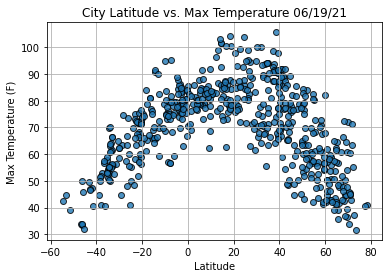

In [19]:
# Import time module

import time

# Build the scatter plot for latitude vs mx temperature

plt.scatter(lats,
           max_temps,
           edgecolor = 'black', linewidths =1, marker ="o",
           alpha=0.8, label='Cities')

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

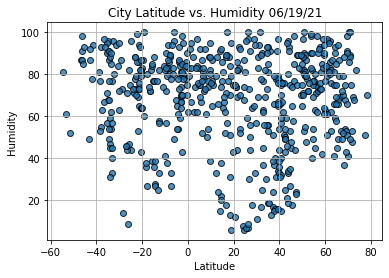

In [20]:
# Build the scatter plot for latitude vs humidity

plt.scatter(lats,
           humidity,
           edgecolor = 'black', linewidths =1, marker ="o",
           alpha=0.8, label='Cities')

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

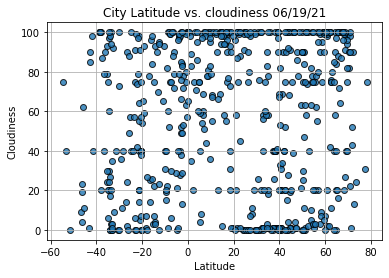

In [23]:
# Build the scatter plot for latitude vs cloudiness

plt.scatter(lats,
           cloudiness,
           edgecolor = 'black', linewidths =1, marker ="o",
           alpha=0.8, label='Cities')

# Incorporate the other graph properties

plt.title(f"City Latitude vs. cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

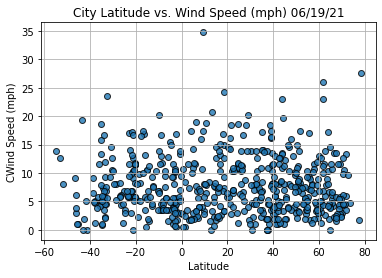

In [24]:
# Build the scatter plot for latitude vs wind_speed

plt.scatter(lats,
           wind_speed,
           edgecolor = 'black', linewidths =1, marker ="o",
           alpha=0.8, label='Cities')

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df =city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

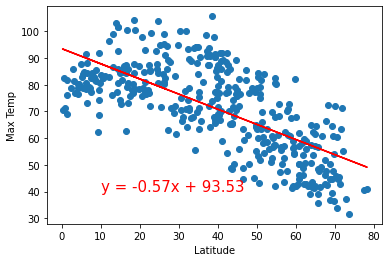

In [33]:
# Linear Regression on the Northern Hemisphere temperature
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

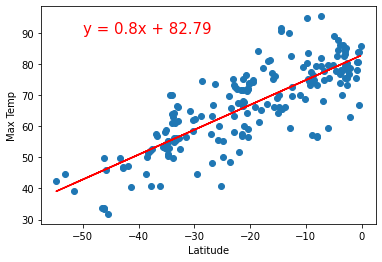

In [36]:
# Linear Regression on the Southern Hemisphere Max Temperature
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

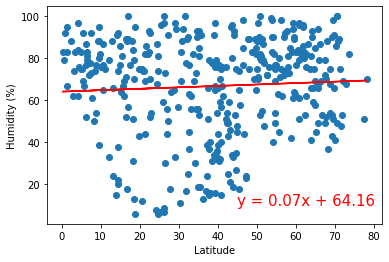

In [39]:
# Linear Regression on the Northern Hemisphere Humidity
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \
                        for % Humidity', 'Humidity (%)',(45,10))

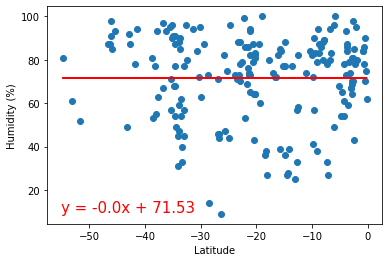

In [42]:
# Linear Regression on the Southern Hemisphere Humidity
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \
                        for % Humidity', 'Humidity (%)',(-55,10))

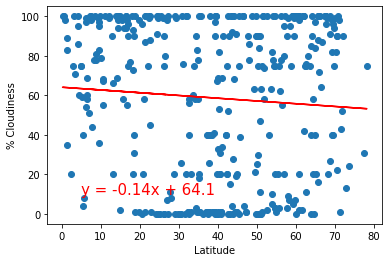

In [45]:
# Linear Regression on the Northern Hemisphere Cloudiness
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(5,10))

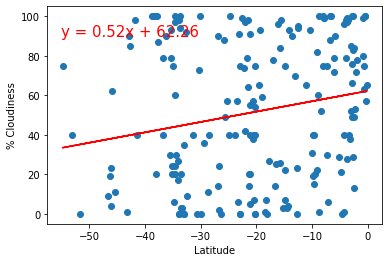

In [47]:
# Linear Regression on the southern Hemisphere Cloudiness
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,90))

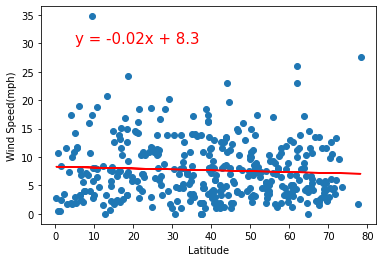

In [49]:
# Linear Regression on the Northern Hemisphere Wind Speed
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \
                        for Wind Speed(mph)', 'Wind Speed(mph)',(5,30))

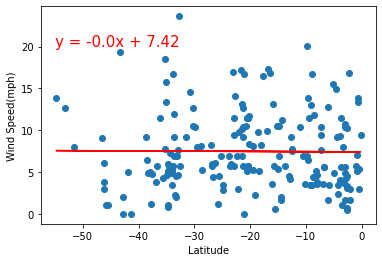

In [54]:
# Linear Regression on the Southern Hemisphere Wind Speed
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \
                        for Wind Speed(mph)', 'Wind Speed(mph)',(-55,20))